## Exemple d'utilisation d'OMEGAlpes pour modéliser un cas d'autoconsommation
*This notebook has been developed with OMEGAlpes version 0.4.1. It is shared with the licence [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0.html), Copyright 2018 G2Elab / MAGE*

>***First time using a Jupyter Notebook ?*** In order to use this notebook online through the Mybinder public service, click the following icon  
[![Binder](https://mybinder.org/badge_logo.svg)](https://hub.mybinder.turing.ac.uk/user/omegalpes-omegalpes_examples-mpbjlj6b/doc/tree/notebooks/PV_autoconsommation_EC.ipynb)

>You can then easily use this Jupyter notebook by runnning each cell with the Run ("Exécuter" in French) icon in the toolbar on top of the page. When the orange notebook icon in the tab turns into an hourglass, this means the code is still running. Do not hesitate to modify and adapt the code, working with Mybinder creates an online copy of the repository ipynb original file.

In [1]:
import os
from python_scripts.EC_autoconsomation import *

%matplotlib notebook
%matplotlib notebook

path = os.getcwd()

## Présentation d'un cas démo

On va s'intéresser ici à un logement résidentiel pour lequel on va modéliser un problème d'autoconsommation avec OMEGAlpes.

On considère dans ce cas une maison possédant une production photovoltaïque sur son toit dont une partie de la production est utilisée pour assurer la fourniture d'électricité au logement dont la consommation est découpée entre trois équipements domestiques contrôlables et le reste:

* une machine à laver
* un lave-linge
* un chauffe-eau électrique

On considère que cette maison est connectée au réseau électrique permettant de fournir l'électricité que la production photovoltaïque ne peut fournir et de recevoir l'électricité produite restante dans les cas où les consommations ne sont pas suffisantes.

On peut ainsi modéliser le problème à l'aide d'OMEGAlpes comme suit:

![PV_self_consumption_optim](https://gricad-gitlab.univ-grenoble-alpes.fr/omegalpes/omegalpes_examples/-/raw/master/notebooks/figures/example_PV_self_consumption.png)

On suppose ainsi avoir le contrôle sur le lancement de la machine à laver et du sèche-linge ainsi que le contrôle sur le chauffe-eau. Cela se traduit par actionner la machine à laver et le sèche-linge sur une période permettant d'optimiser le problème posé. De même, l'électricité va être stockée thermiquement dans un ballon d'eau chaude dans ce même but

![PV_self_consumption_optim](https://gricad-gitlab.univ-grenoble-alpes.fr/omegalpes/omegalpes_examples/-/raw/master/notebooks/figures/PV_EC_NB_CTRL.PNG)

Pour ce qui est des objectifs, on va en se limiter à deux :

* minimiser le coût de la consommation énergétique
* optimiser la consommation locale de l'énergie

![PV_self_consumption_optim](https://gricad-gitlab.univ-grenoble-alpes.fr/omegalpes/omegalpes_examples/-/raw/master/notebooks/figures/PV_EC_NB_OBJ.PNG)

## Gestion des données d'entrée

Dans cette partie, nous indiquons les données nécessaires pour faire fonctionner le problème d'optimisation. Ainsi en reprenant le cas présenter ci-dessus, il est nécessaire de fournir comme données d'entrée:

* les profils de consommation
* les profils de radiation solaire
* les données économiques et environnementales

N.B. Si tel n'est pas le cas, il est nécessaire de traiter les données pour que les profils possèdent les mêmes pas de temps sur la même durée.

### Consommation

Il est donc possible de fournir des profils de consommation à l'outil. 
Pour cet exemple, nous présentons ce type de données de consommation, mais il est possible de fournir un autre fichier, selon certaines conditions, définies dans la parties décrivant les caractéristiques des données.

<IPython.core.display.Javascript object>


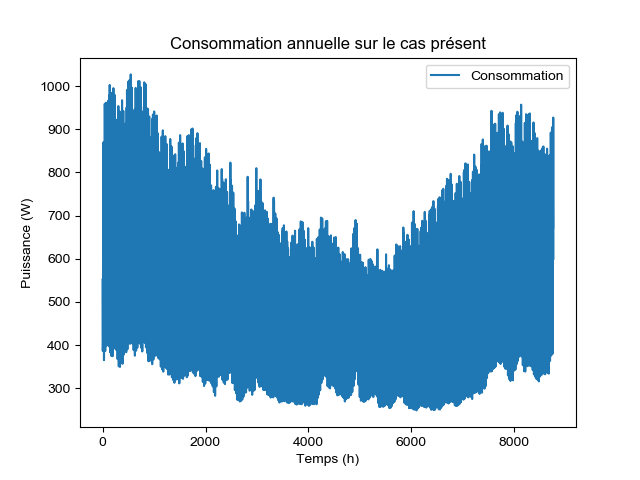

Consommation annuelle du logement = 4453 kWh


In [2]:
consumption_profile(path)

A noter qu'à ce profil de consommation, nous rajoutons dans ce cas démo les consommations de la machine à laver, du sèche-linge et de

### Production

De la même manière, nous pouvons fournir des profils de production solaire, sur la base de données sur les radiations solaires, mesurées ou évaluées, sur une année à un endroit donné (ici Grenoble).

On peut ainsi fournit trois données de dimensionnement pour calculer ces profils que sont:
* l'inclinaison des panneaux (à savoir l'angle qu'ils font avec le sol
* l'azimuth des panneaux (à savoi l'angle par rapport à la direction du Sud)
* la surface de panneaux installée

<IPython.core.display.Javascript object>


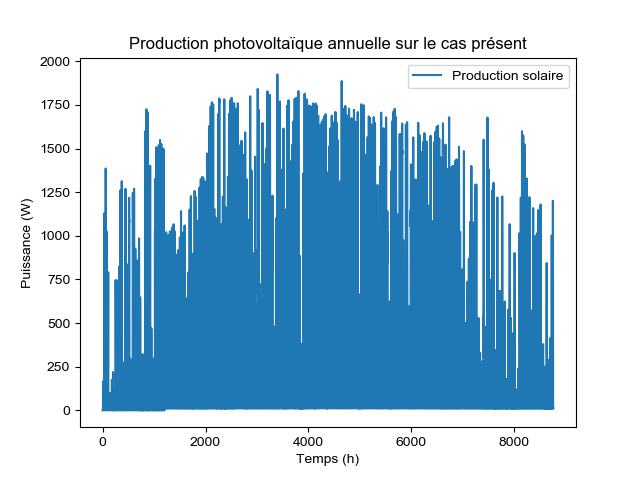

Production photovoltaïque annuelle du logement = 2650 kWh


In [3]:
inclinaison = 25.4
azimuth = 23.8
surface = 12.2

solar_profile(path, inclinaison, azimuth, surface)

### Environnement, Economie

Pour les données économiques et environnementales, on différencie deux types de données:
* des données scalaires correspondant à un coût de l'énergie (économique ou environnementale) est fixée dans le temps.
* des profils temporelles correspondant à un coût variable dans le temps

Pour cette partie, nous allons fixer un coût variable de l'énergie sur la base de [tarifs heures creuses, heures pleines](https://www.fournisseur-energie.com/aides-fiches-techniques/prix-kwh-heures-creuses/).
De la même manière, nous aurions pu fournir des données environnementales (e.g. profil d'émission CO2 pour l'électricité fournir).

### Caractéristique des données

Pour pouvoir utiliser les données d'entrée correctement, il est nécessaire de préciser certaines caractéristiques importantes comme le pas de temps des profils ou la durée de ses profils (données sur une journée, une semaine, un ou plusieurs mois, un an). Sachant cela, on peut alors fournir ces informations comme suit:

In [4]:
pas_de_temps = 1 # donnée fournie en heure
duree = 24 # correspondant à un nombre d'heures (24 pour une journée, 168 pour une semaine, 720 pour un mois (de 30 jours) et 8760 pour un an)

## Possibilité de modélisation et résultats

On s'intéresse ici à présenter les résultats que l'on peut obtenir sur une simple journée sur le cas démo.

<IPython.core.display.Javascript object>


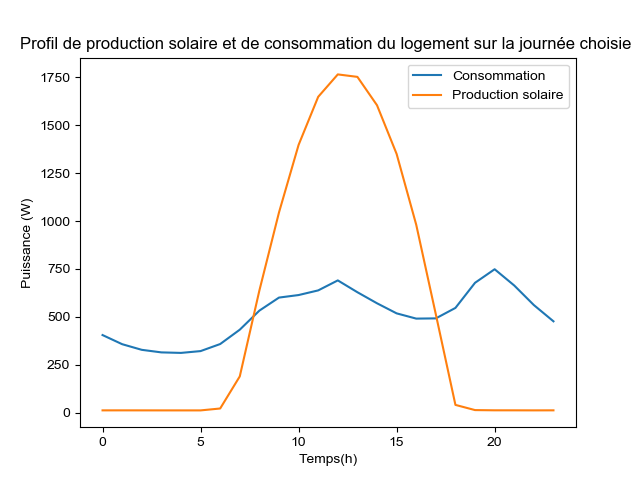

In [5]:
date_debut = '30/03/2019 00:00'
date_fin = '30/03/2019 23:00'

solar_and_consumption_profile(path, inclinaison, azimuth, surface, date_debut,
                                  date_fin)

A ces données de base, on va rajouter la consommation d'un lave-linge et d'un sèche linge que l'on va pouvoir faire fonctionner sur des plages horaires spécifiques (entre 12:00 et 14:00 et entre 18:00 et 0:00)

### Consommer localement

Pour l'objectif de consommation local de l'énergie, on va minimiser les échanges avec le réseau électrique pour ainsi faovriser la consommation de la production photovoltaïque.

In [6]:
objectif = 'local'

time, elec_node, heat_node, dwelling_consumption, washer, dryer, \
           power_grid_imports, power_grid_exports, water_tank, pv_pannels, \
           water_heater, dhw = optimize_EC_AC(path, inclinaison, azimuth, surface, date_debut, date_fin,
                     pas_de_temps, objectif)


You are studying the period from 2019-03-30 00:00:00 to 2019-03-30 23:00:00
Creating the power_grid_imports.
Creating the power_grid_exports.
Creating the PV_pannels.
Creating the dwelling_consumption.
Creating the washer.
operating time range index 1:  [12, 14]
operating time range index 2:  [18, 23]
Creating the dryer.
Creating the water_heater_therm_prod.
Creating the water_heater_elec_cons.
Creating the water_heater.
Creating the dhw.
Creating the water_tank.
Creating the elec_node.
Creating the heat_node.

--- Adding all variables to the model ---
Adding variable : power_grid_imports_p
Adding variable : power_grid_imports_e_tot
Adding variable : power_grid_imports_u
Adding variable : power_grid_imports_operating_cost
Adding variable : power_grid_exports_p
Adding variable : power_grid_exports_e_tot
Adding variable : power_grid_exports_u
Adding variable : PV_pannels_p
Adding variable : PV_pannels_e_tot
Adding variable : dwelling_consumption_p
Adding variable : dwelling_consumption_e

Resolution duration = 0.22940826416015625 seconds.

 - - - - - UPDATE RESULTS - - - - - 
Updating unit : elec_node
Updating unit : power_grid_imports
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : operating_cost
Updating unit : power_grid_exports
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : PV_pannels
	Quantity : p
	Quantity : e_tot
Updating unit : dwelling_consumption
	Quantity : p
	Quantity : e_tot
Updating unit : washer
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : start_up
	Quantity : power_values
Updating unit : dryer
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : start_up
	Quantity : power_values
Updating unit : water_heater_elec_cons
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : water_heater
Updating unit : water_heater_therm_prod
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : heat_node
Updating unit : dhw
	Quantity : p
	Quantity : e_tot
Updating unit : water_tank
	Quantity : p
	Quantity : e_tot
	Q

Une fois le problème résolu, il est possible d'afficher un ensemble de sorties et de courbes résultant de cette résolution.

#### Affichage des flux énergétiques

<IPython.core.display.Javascript object>


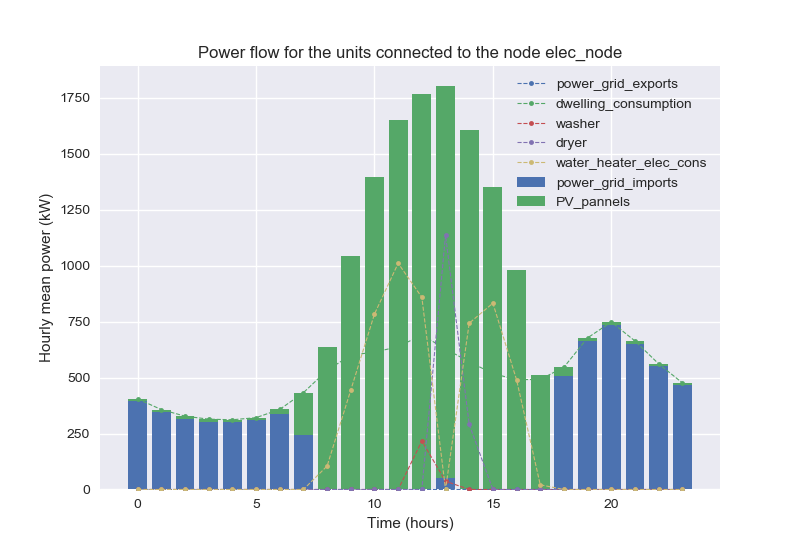


Preparing to plot the energetic flows through the node elec_node.
	Add power from power_grid_imports.
	Add power from power_grid_exports.
	Add power from PV_pannels.
	Add power from dwelling_consumption.
	Add power from washer.
	Add power from dryer.
	Add power from water_heater_elec_cons.


<IPython.core.display.Javascript object>


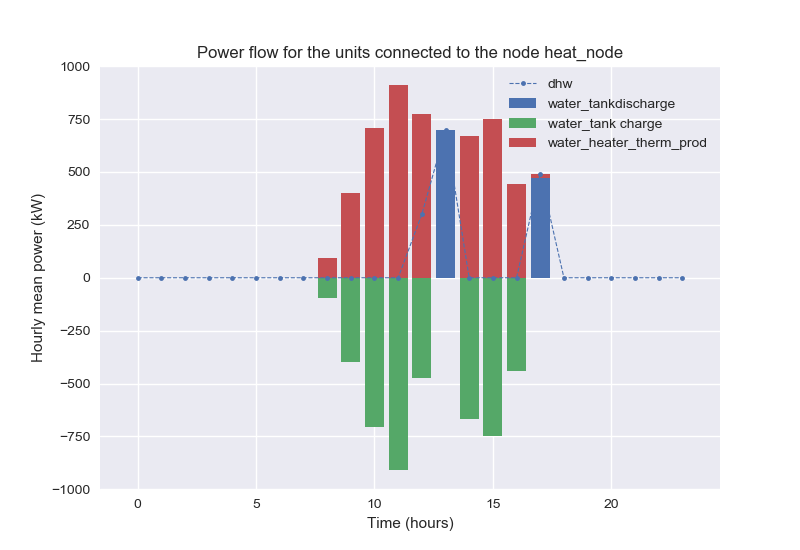


Preparing to plot the energetic flows through the node heat_node.
	Add power from dhw.
	Add power from water_tank.
	Add power from water_heater_therm_prod.


In [7]:
plot_nodes(elec_node, heat_node)

#### Affichage de profil d'unité énergétiques

<IPython.core.display.Javascript object>


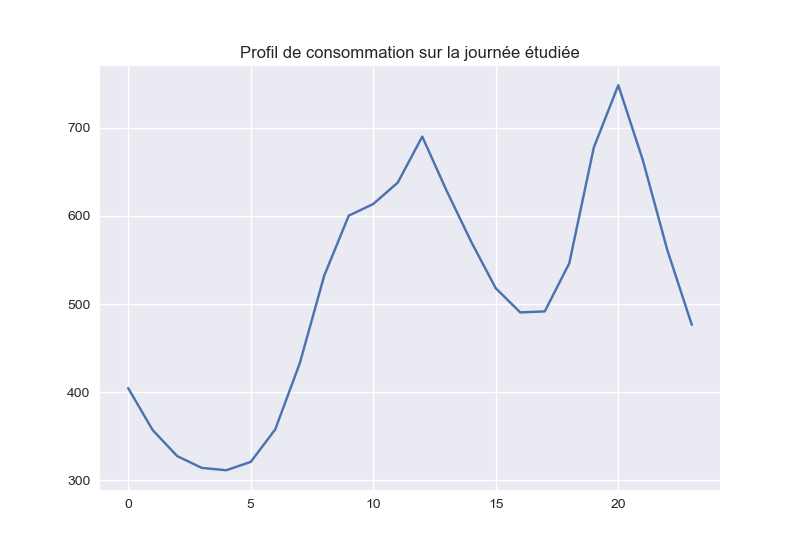

In [8]:
plot_consumption(time, dwelling_consumption)

<IPython.core.display.Javascript object>


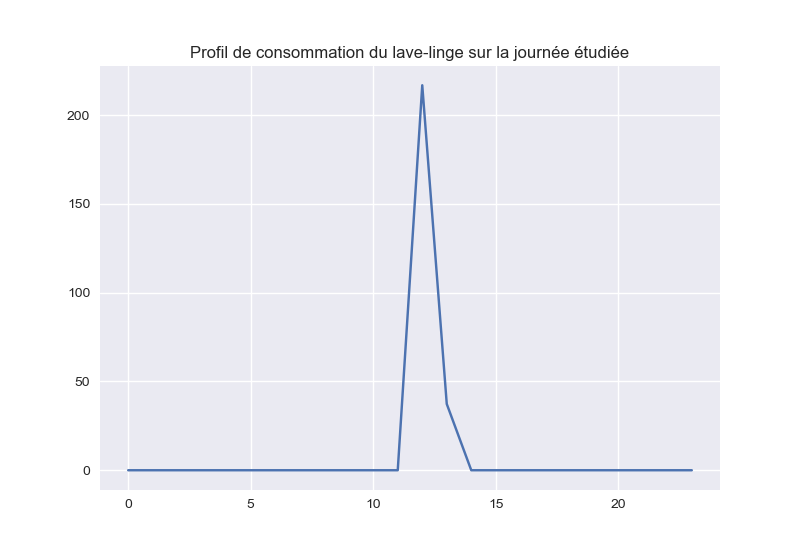

<IPython.core.display.Javascript object>


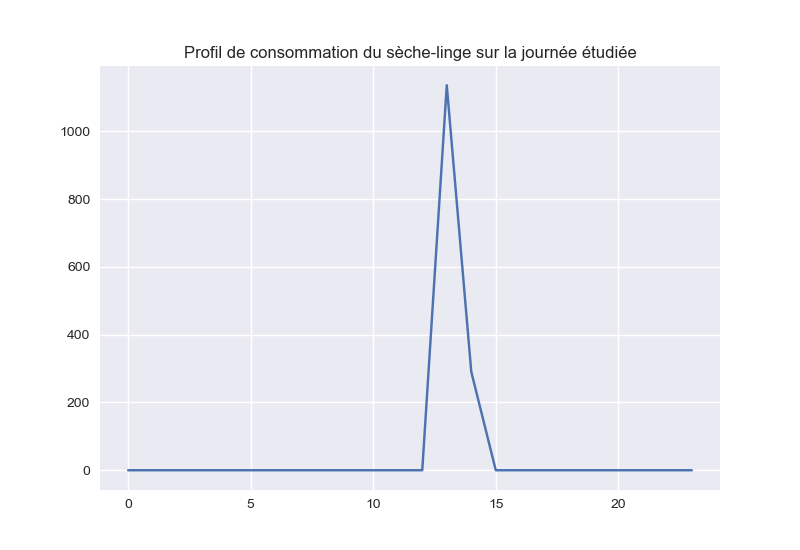

In [9]:
plot_equipments(time, washer, dryer)

<IPython.core.display.Javascript object>


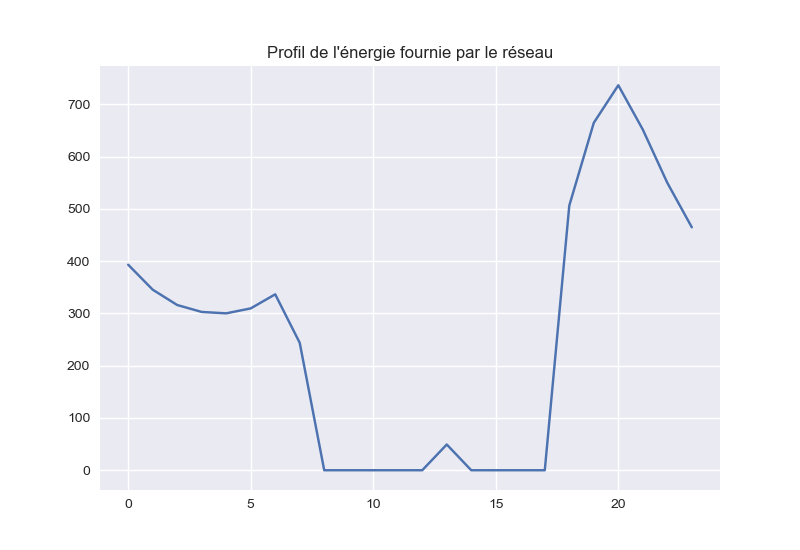

In [10]:
plot_grid(time, power_grid_imports)

<IPython.core.display.Javascript object>


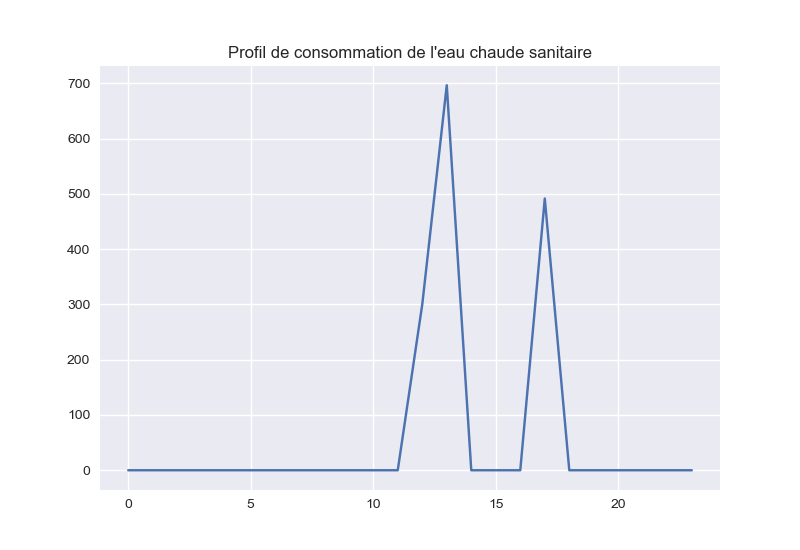

<IPython.core.display.Javascript object>


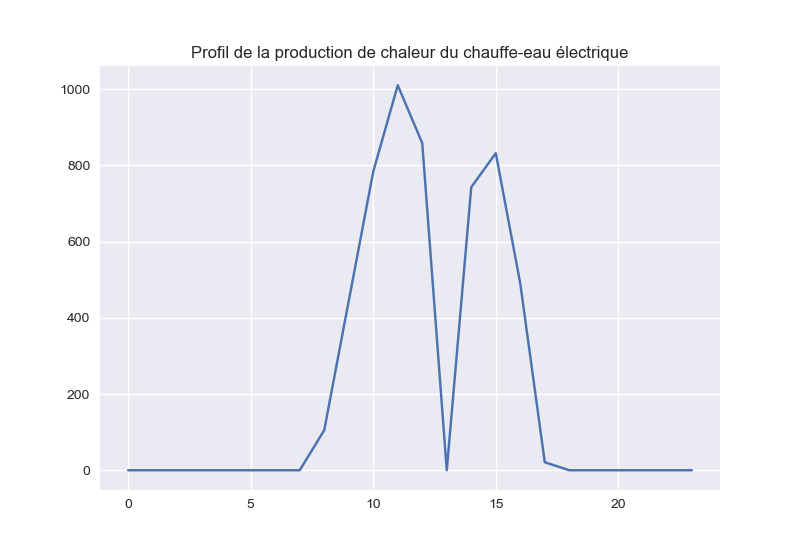

<IPython.core.display.Javascript object>


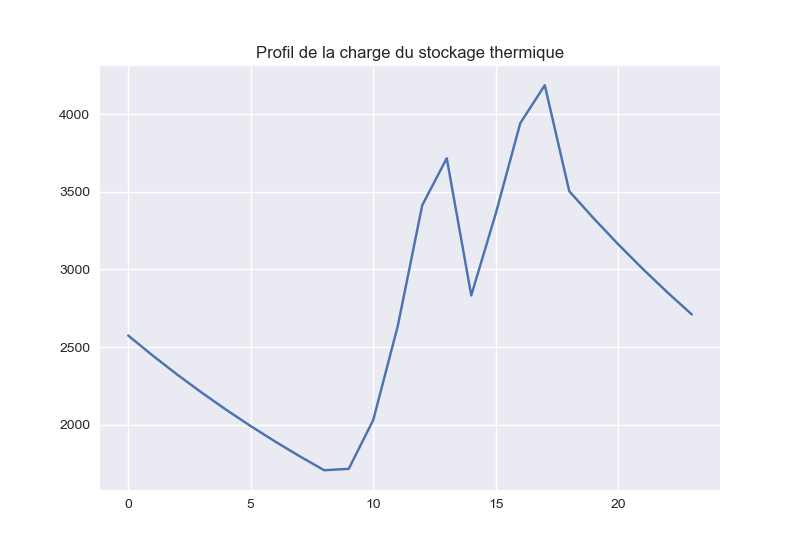

In [11]:
plot_dhw(time, dhw,water_heater, water_tank)

#### Calcul d'indicateurs en post-processing

In [12]:
determine_AC_outputs(pv_pannels, power_grid_exports, power_grid_imports,
                         dwelling_consumption, washer, dryer, water_heater)

Le taux d'autoconsommation est de 68 %
Le taux d'autoproduction est de 100 %
Le coût de l'énergie fournie par le réseau est de 0.84 €


### Consommer économiquement

In [13]:
objectif = 'economique'

time, elec_node, heat_node, dwelling_consumption, washer, dryer, \
           power_grid_imports, power_grid_exports, water_tank, pv_pannels, \
           water_heater, dhw = optimize_EC_AC(path, inclinaison, azimuth, surface, date_debut, date_fin,
                     pas_de_temps, objectif)


You are studying the period from 2019-03-30 00:00:00 to 2019-03-30 23:00:00
Creating the power_grid_imports.
Creating the power_grid_exports.
Creating the PV_pannels.
Creating the dwelling_consumption.
Creating the washer.
operating time range index 1:  [12, 14]
operating time range index 2:  [18, 23]
Creating the dryer.
Creating the water_heater_therm_prod.
Creating the water_heater_elec_cons.
Creating the water_heater.
Creating the dhw.
Creating the water_tank.
Creating the elec_node.
Creating the heat_node.

--- Adding all variables to the model ---
Adding variable : power_grid_imports_p
Adding variable : power_grid_imports_e_tot
Adding variable : power_grid_imports_u
Adding variable : power_grid_imports_operating_cost
Adding variable : power_grid_exports_p
Adding variable : power_grid_exports_e_tot
Adding variable : power_grid_exports_u
Adding variable : PV_pannels_p
Adding variable : PV_pannels_e_tot
Adding variable : dwelling_consumption_p
Adding variable : dwelling_consumption_e

Resolution duration = 0.23418569564819336 seconds.

 - - - - - UPDATE RESULTS - - - - - 
Updating unit : elec_node
Updating unit : power_grid_imports
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : operating_cost
Updating unit : power_grid_exports
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : PV_pannels
	Quantity : p
	Quantity : e_tot
Updating unit : dwelling_consumption
	Quantity : p
	Quantity : e_tot
Updating unit : washer
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : start_up
	Quantity : power_values
Updating unit : dryer
	Quantity : p
	Quantity : e_tot
	Quantity : u
	Quantity : start_up
	Quantity : power_values
Updating unit : water_heater_elec_cons
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : water_heater
Updating unit : water_heater_therm_prod
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : heat_node
Updating unit : dhw
	Quantity : p
	Quantity : e_tot
Updating unit : water_tank
	Quantity : p
	Quantity : e_tot
	Q

#### Affichage des flux énergétiques

<IPython.core.display.Javascript object>


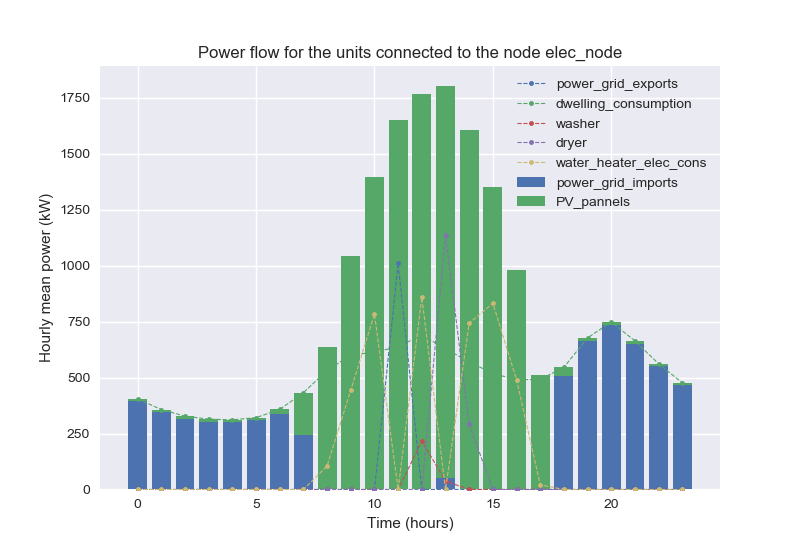


Preparing to plot the energetic flows through the node elec_node.
	Add power from power_grid_imports.
	Add power from power_grid_exports.
	Add power from PV_pannels.
	Add power from dwelling_consumption.
	Add power from washer.
	Add power from dryer.
	Add power from water_heater_elec_cons.


<IPython.core.display.Javascript object>


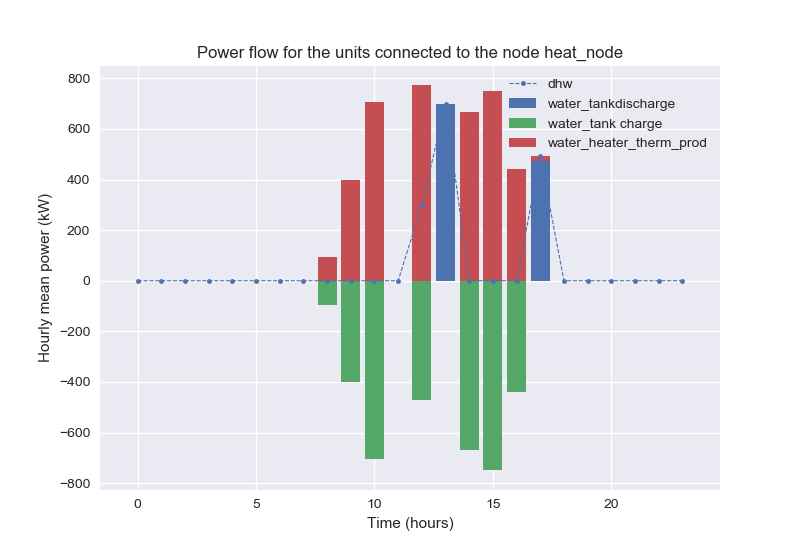


Preparing to plot the energetic flows through the node heat_node.
	Add power from dhw.
	Add power from water_tank.
	Add power from water_heater_therm_prod.


In [14]:
plot_nodes(elec_node, heat_node)

#### Affichage de profil d'unité énergétiques

<IPython.core.display.Javascript object>


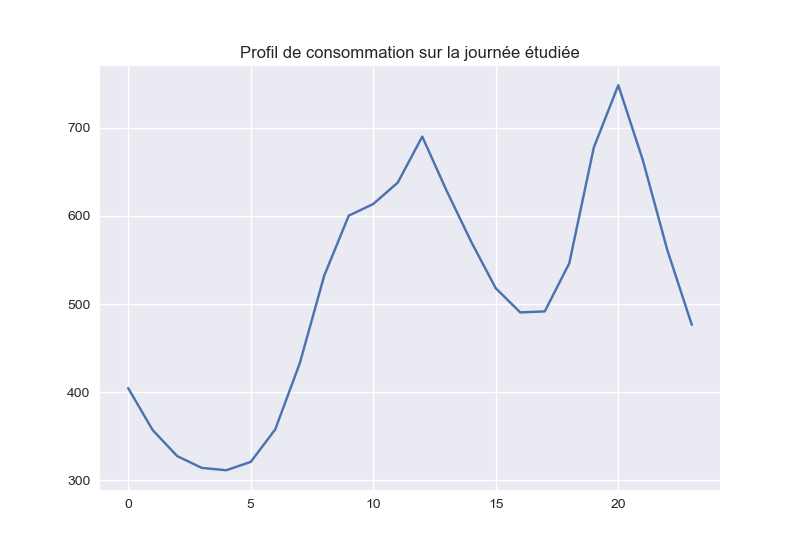

In [15]:
plot_consumption(time, dwelling_consumption)

<IPython.core.display.Javascript object>


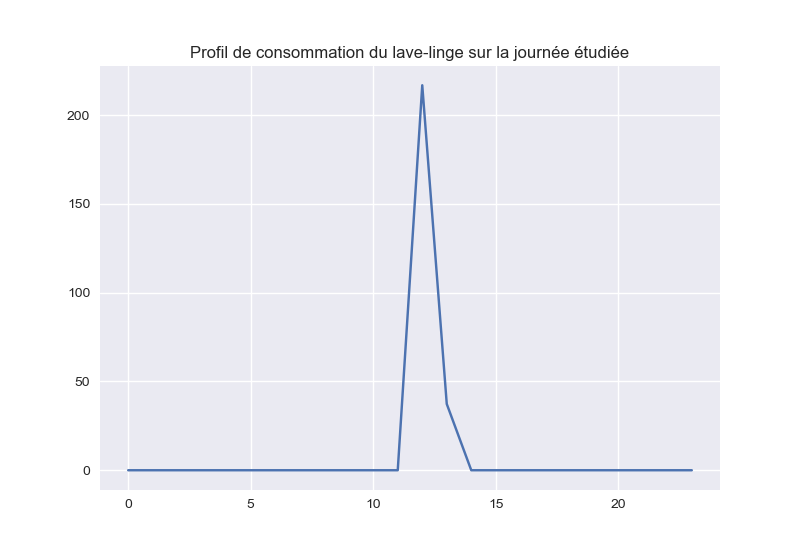

<IPython.core.display.Javascript object>


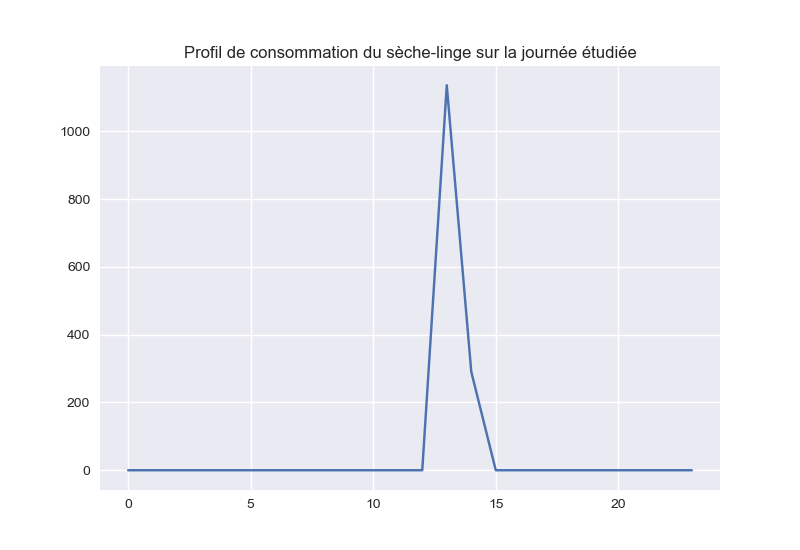

In [16]:
plot_equipments(time, washer, dryer)

<IPython.core.display.Javascript object>


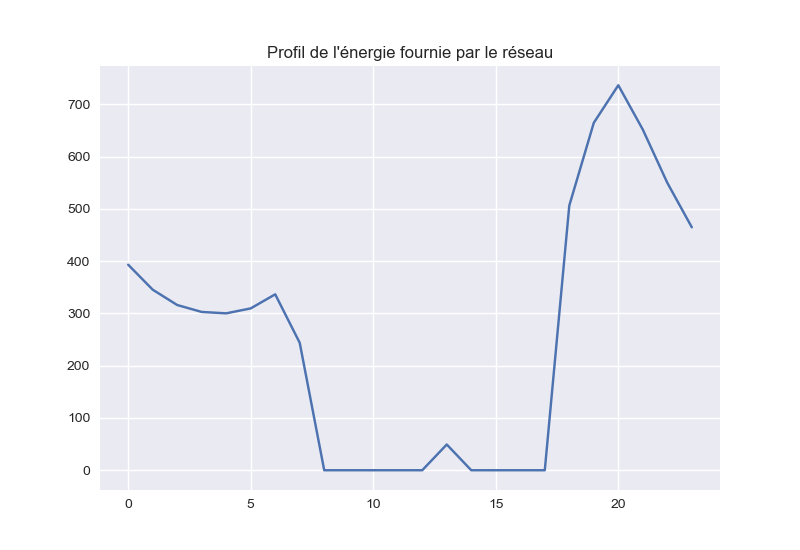

In [17]:
plot_grid(time, power_grid_imports)

<IPython.core.display.Javascript object>


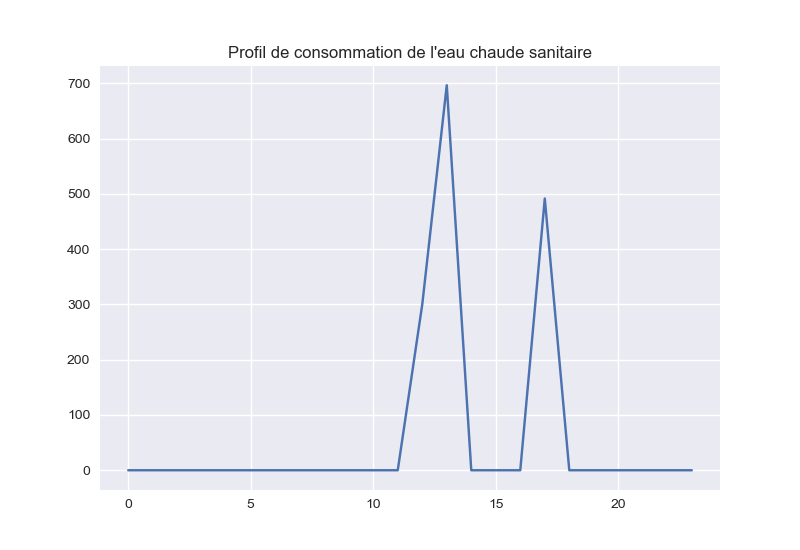

<IPython.core.display.Javascript object>


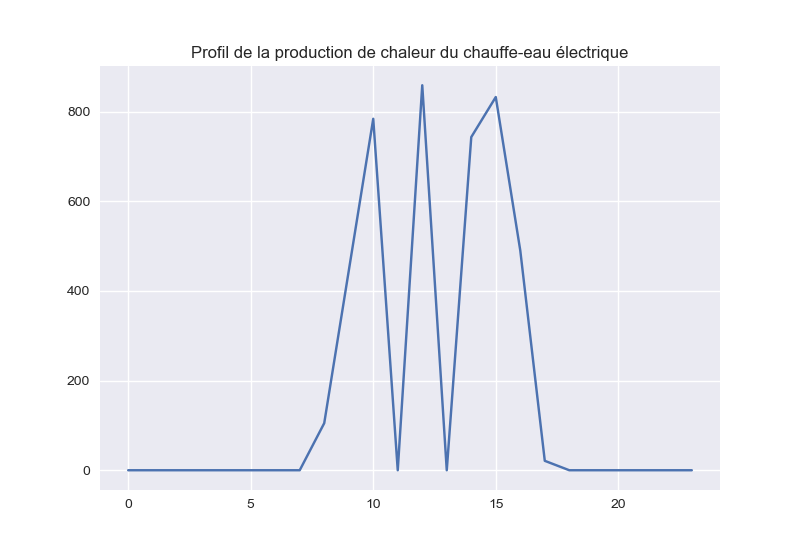

C:\Anaconda\lib\site-packages\omegalpes\general\utils\plots.py:266: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


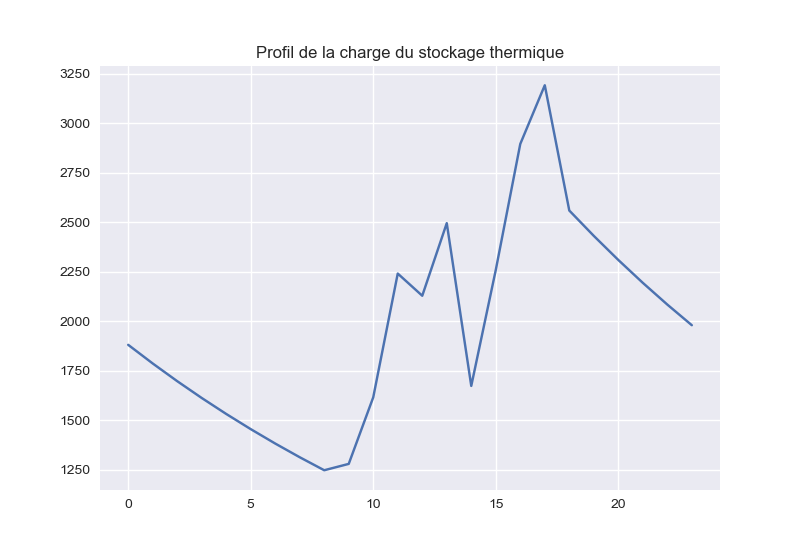

In [18]:
plot_dhw(time, dhw,water_heater, water_tank)

#### Calcul d'indicateurs en post-processing

In [19]:
determine_AC_outputs(pv_pannels, power_grid_exports, power_grid_imports,
                         dwelling_consumption, washer, dryer, water_heater)

Le taux d'autoconsommation est de 66 %
Le taux d'autoproduction est de 92 %
Le coût de l'énergie fournie par le réseau est de 0.84 €
